In [2]:
from PreProcessing.VehicleDataPreprocessor import VehicleDataPreprocessor
from PreProcessing.FeatureSelector import FeatureSelector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LinearModel.LinearModel import LinearRegression, StandardScaler
from sklearn.model_selection import train_test_split

from utils.metrics import mean_absolute_error


def visualize_results(X_test, y_test, y_pred, title="Predictions vs. Actual Values"):
    """Visualize model predictions against actual values"""
    plt.figure(figsize=(10, 6))

    # For 1D feature, plot data points
    if X_test.shape[1] == 1:
        plt.scatter(X_test, y_test, color='blue', label='Actual values')
        plt.scatter(X_test, y_pred, color='red', label='Predictions')
        plt.xlabel('X')
        plt.ylabel('y')
    else:
        # For multi-dimensional data, just plot predicted vs actual
        plt.scatter(y_test, y_pred)
        plt.xlabel('Actual values')
        plt.ylabel('Predicted values')
        # Add perfect prediction line
        min_val = min(np.min(y_test), np.min(y_pred))
        max_val = max(np.max(y_test), np.max(y_pred))
        plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
if __name__ == "__main__":
    df = pd.read_csv("../../Data/train.csv")
    processor = VehicleDataPreprocessor()
    df = processor.preprocess(df, train=True, norm=False)
    # featSelector = FeatureSelector(pre_process_df=df)
    # selected_features, df = featSelector.get_df(model_id=4)
    scaler = StandardScaler()

    y = df["Log_Price"]
    X = df.drop("Log_Price", axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

    X_train = FeatureSelector._non_linearize_features(X_train)
    X_test = FeatureSelector._non_linearize_features(X_test)

    _, X_train = FeatureSelector.get_df(X_train, model_id=1, get_Log_Price=False)
    _, X_test = FeatureSelector.get_df(X_test, model_id=1, get_Log_Price=False)

    X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy().flatten(), y_test.to_numpy().flatten()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # print(X_test)
    # print(y_test)

    # Huấn luyện với normal equation
    print("\n=== Huấn luyện bằng Normal Equation ===")
    model1 = LinearRegression(optimizer='normal_equation')
    model1.fit(X_train, y_train, verbose=True)
    model1.evaluate(X_test, y_test)

    # Huấn luyện với gradient descent
    print("\n=== Huấn luyện bằng Gradient Descent ===")
    model2 = LinearRegression(optimizer='gradient_descent', learning_rate=0.01, max_iter=1000)
    model2.fit(X_train, y_train, verbose=True)
    model2.evaluate(X_test, y_test)

    # Huấn luyện với stochastic gradient descent
    print("\n=== Huấn luyện bằng Stochastic Gradient Descent ===")
    model3 = LinearRegression(optimizer='sgd', learning_rate=0.01, max_iter=10000, batch_size=16)
    model3.fit(X_train, y_train, verbose=True)
    model3.evaluate(X_test, y_test)

    # Huấn luyện với Adam
    print("\n=== Huấn luyện bằng Adam ===")
    model4 = LinearRegression(optimizer='adam', learning_rate=0.01, max_iter=500000, tol=1e-34)
    model4.fit(X_train, y_train, verbose=True)
    model4.evaluate(X_test, y_test)
    print(model4.weights)



C:\Users\admin\OneDrive - VNU-HCMUS\[PPH]_[UNIVERSITY PROJECT]\Maths-for-AI\PreProcessing\VehicleDataPreprocessor.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Price', axis=1, inplace=True)
C:\Users\admin\OneDrive - VNU-HCMUS\[PPH]_[UNIVERSITY PROJECT]\Maths-for-AI\PreProcessing\VehicleDataPreprocessor.py:104: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace


=== Huấn luyện bằng Normal Equation ===
Đang huấn luyện với BaseOptimizer
Kích thước dữ liệu: (1474, 31)
Kết quả đánh giá:
MSE: 0.065274
RMSE: 0.255488
MAE: 0.181025
R²: 0.935229
MAE exp: 309747.996902

=== Huấn luyện bằng Gradient Descent ===
Đang huấn luyện với GradientDescent
Kích thước dữ liệu: (1474, 31)
Vòng lặp 0, Loss: 186.109684
Vòng lặp 100, Loss: 24.699754
Vòng lặp 200, Loss: 3.442977
Vòng lặp 300, Loss: 0.578147
Vòng lặp 400, Loss: 0.181952
Vòng lặp 500, Loss: 0.119847
Hội tụ tại vòng lặp 594
Kết quả đánh giá:
MSE: 0.107455
RMSE: 0.327803
MAE: 0.245726
R²: 0.893373
MAE exp: 393684.827002

=== Huấn luyện bằng Stochastic Gradient Descent ===
Đang huấn luyện với StochasticGradientDescent
Kích thước dữ liệu: (1474, 31)
Epoch 0, Loss: 95.889786
Epoch 10, Loss: 0.085261
Epoch 20, Loss: 0.076847
Hội tụ tại epoch 25
Kết quả đánh giá:
MSE: 0.078983
RMSE: 0.281040
MAE: 0.206726
R²: 0.921625
MAE exp: 390322.594151

=== Huấn luyện bằng Adam ===
Đang huấn luyện với Adam
Kích thước dữ l

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame (df) chứa dữ liệu của bạn
# df = pd.read_csv('your_data.csv')

# Hàm để lấy các cột số thực từ DataFrame
def get_numeric_columns(df):
    """Chọn các cột có kiểu dữ liệu số thực (float hoặc int)"""
    return df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns.tolist()

# Hàm chuẩn bị dữ liệu
def prepare_data(df, target_column, test_size=0.2, random_state=42):
    """
    Chuẩn bị dữ liệu cho việc chọn tính năng

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame chứa dữ liệu
    target_column : str
        Tên cột mục tiêu (y)
    test_size : float
        Tỷ lệ dữ liệu kiểm tra
    random_state : int
        Seed cho việc phân chia dữ liệu

    Returns:
    --------
    X_train, X_test, y_train, y_test, numeric_columns
    """
    # Lấy các cột số thực
    numeric_columns = get_numeric_columns(df)

    # Loại bỏ cột mục tiêu khỏi danh sách các cột tính năng
    if target_column in numeric_columns:
        numeric_columns.remove(target_column)

    # Chia dữ liệu
    X = df[numeric_columns]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    return X_train, X_test, y_train, y_test, numeric_columns

# 1. Chọn tính năng sử dụng tương quan (Correlation)
def select_features_correlation(df, target_column, threshold=0.5):
    """
    Chọn tính năng dựa trên hệ số tương quan với biến mục tiêu

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame chứa dữ liệu
    target_column : str
        Tên cột mục tiêu
    threshold : float
        Ngưỡng tương quan để chọn tính năng

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    numeric_cols = get_numeric_columns(df)

    # Tính ma trận tương quan
    correlation_matrix = df[numeric_cols].corr()

    # Lấy tương quan với biến mục tiêu
    correlation_with_target = correlation_matrix[target_column].abs()

    # Loại bỏ tương quan của biến mục tiêu với chính nó
    correlation_with_target = correlation_with_target.drop(target_column)

    # Chọn các tính năng có tương quan cao hơn ngưỡng
    selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

    return selected_features, correlation_with_target

# 2. Chọn tính năng sử dụng SelectKBest và f_regression
def select_features_f_regression(X_train, y_train, k=5):
    """
    Chọn tính năng sử dụng f_regression

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu
    k : int
        Số lượng tính năng cần chọn

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Áp dụng SelectKBest với f_regression
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X_train_scaled, y_train)

    # Lấy điểm số và chọn các tính năng
    feature_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'Score': selector.scores_
    })

    # Sắp xếp theo điểm số giảm dần
    feature_scores = feature_scores.sort_values('Score', ascending=False)

    # Chọn k tính năng có điểm cao nhất
    selected_features = feature_scores.head(k)['Feature'].tolist()

    return selected_features, feature_scores

# 3. Chọn tính năng sử dụng Recursive Feature Elimination (RFE)
def select_features_rfe(X_train, y_train, n_features_to_select=5):
    """
    Chọn tính năng sử dụng Recursive Feature Elimination

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu
    n_features_to_select : int
        Số lượng tính năng cần chọn

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Khởi tạo mô hình Linear Regression
    model = LinearRegression()

    # Áp dụng RFE
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train_scaled, y_train)

    # Lấy các tính năng được chọn
    feature_ranking = pd.DataFrame({
        'Feature': X_train.columns,
        'Ranking': rfe.ranking_
    })

    # Sắp xếp theo thứ hạng tăng dần (thứ hạng 1 là tốt nhất)
    feature_ranking = feature_ranking.sort_values('Ranking')

    # Chọn các tính năng có thứ hạng bằng 1
    selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()

    return selected_features, feature_ranking

# 4. Chọn tính năng dựa trên hệ số hồi quy
def select_features_coefficients(X_train, y_train, threshold=0.1):
    """
    Chọn tính năng dựa trên giá trị tuyệt đối của hệ số hồi quy

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu
    threshold : float
        Ngưỡng giá trị tuyệt đối của hệ số hồi quy để chọn tính năng

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Khởi tạo và huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Lấy hệ số hồi quy
    coefficients = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': model.coef_
    })

    # Lấy giá trị tuyệt đối của hệ số
    coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

    # Sắp xếp theo giá trị tuyệt đối giảm dần
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

    # Chọn các tính năng có hệ số lớn hơn ngưỡng
    selected_features = coefficients[coefficients['Abs_Coefficient'] > threshold]['Feature'].tolist()

    return selected_features, coefficients

# 5. Trực quan hóa đánh giá tính năng
def visualize_feature_importance(feature_scores, title="Feature Importance", figsize=(12, 8)):
    """
    Trực quan hóa điểm số quan trọng của tính năng

    Parameters:
    -----------
    feature_scores : pandas.DataFrame
        DataFrame chứa điểm số của các tính năng
    title : str
        Tiêu đề của biểu đồ
    figsize : tuple
        Kích thước của biểu đồ
    """
    # Sắp xếp theo điểm số giảm dần
    if 'Score' in feature_scores.columns:
        sort_col = 'Score'
        feature_scores = feature_scores.sort_values(sort_col, ascending=False)
    elif 'Coefficient' in feature_scores.columns:
        sort_col = 'Abs_Coefficient'
        feature_scores = feature_scores.sort_values(sort_col, ascending=False)

    plt.figure(figsize=figsize)

    if 'Score' in feature_scores.columns:
        plt.barh(feature_scores['Feature'], feature_scores['Score'])
        plt.xlabel('Score')
    elif 'Coefficient' in feature_scores.columns:
        plt.barh(feature_scores['Feature'], feature_scores['Abs_Coefficient'])
        plt.xlabel('Absolute Coefficient')

    plt.ylabel('Feature')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ví dụ sử dụng:
# 1. Đọc dữ liệu
# df = pd.read_csv('your_data.csv')

# 2. Chuẩn bị dữ liệu
# X_train, X_test, y_train, y_test, numeric_columns = prepare_data(df, 'target_column')

# 3. Áp dụng các phương pháp chọn tính năng
# corr_features, corr_scores = select_features_correlation(df, 'target_column', threshold=0.5)
# fregression_features, fregression_scores = select_features_f_regression(X_train, y_train, k=5)
# rfe_features, rfe_ranking = select_features_rfe(X_train, y_train, n_features_to_select=5)
# coef_features, coef_scores = select_features_coefficients(X_train, y_train, threshold=0.1)

# 4. Trực quan hóa
# visualize_feature_importance(fregression_scores, title="Feature Importance (f_regression)")
# visualize_feature_importance(coef_scores, title="Feature Importance (Coefficients)")

C:\Users\admin\OneDrive - VNU-HCMUS\[PPH]_[UNIVERSITY PROJECT]\Maths-for-AI\PreProcessing\VehicleDataPreprocessor.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Price', axis=1, inplace=True)
C:\Users\admin\OneDrive - VNU-HCMUS\[PPH]_[UNIVERSITY PROJECT]\Maths-for-AI\PreProcessing\VehicleDataPreprocessor.py:104: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace

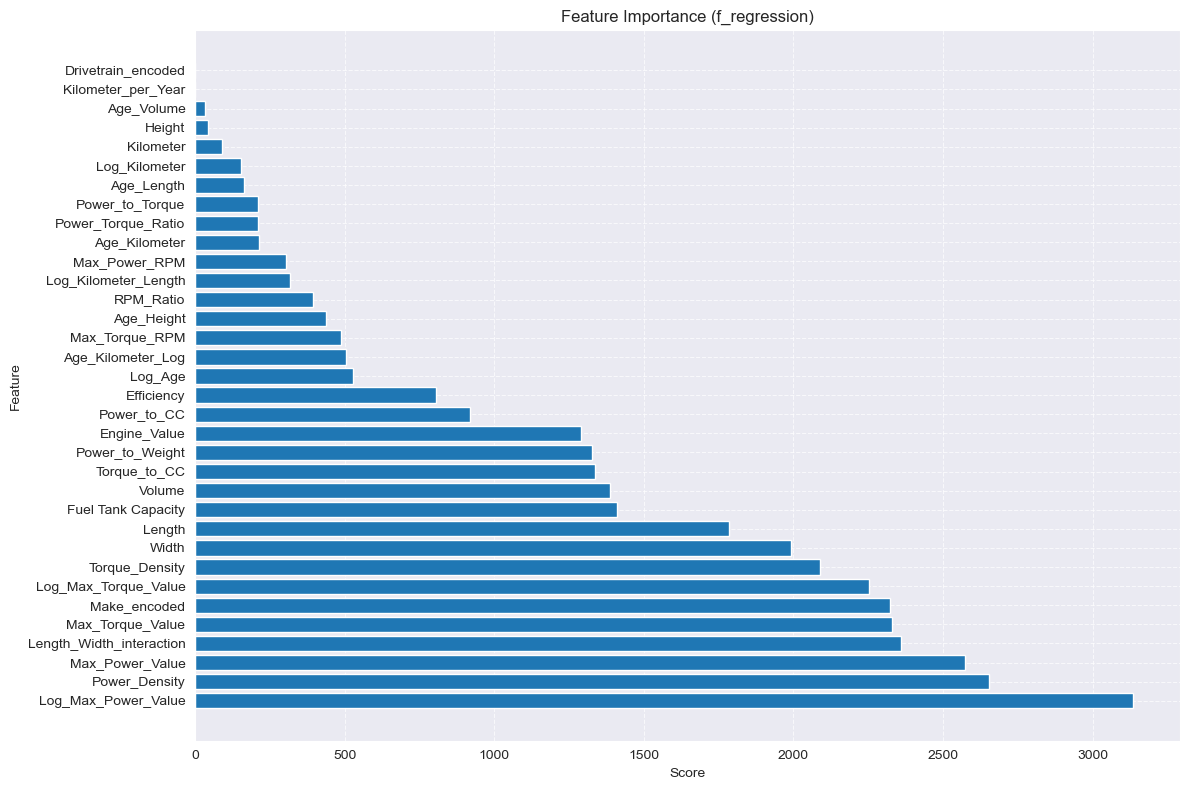

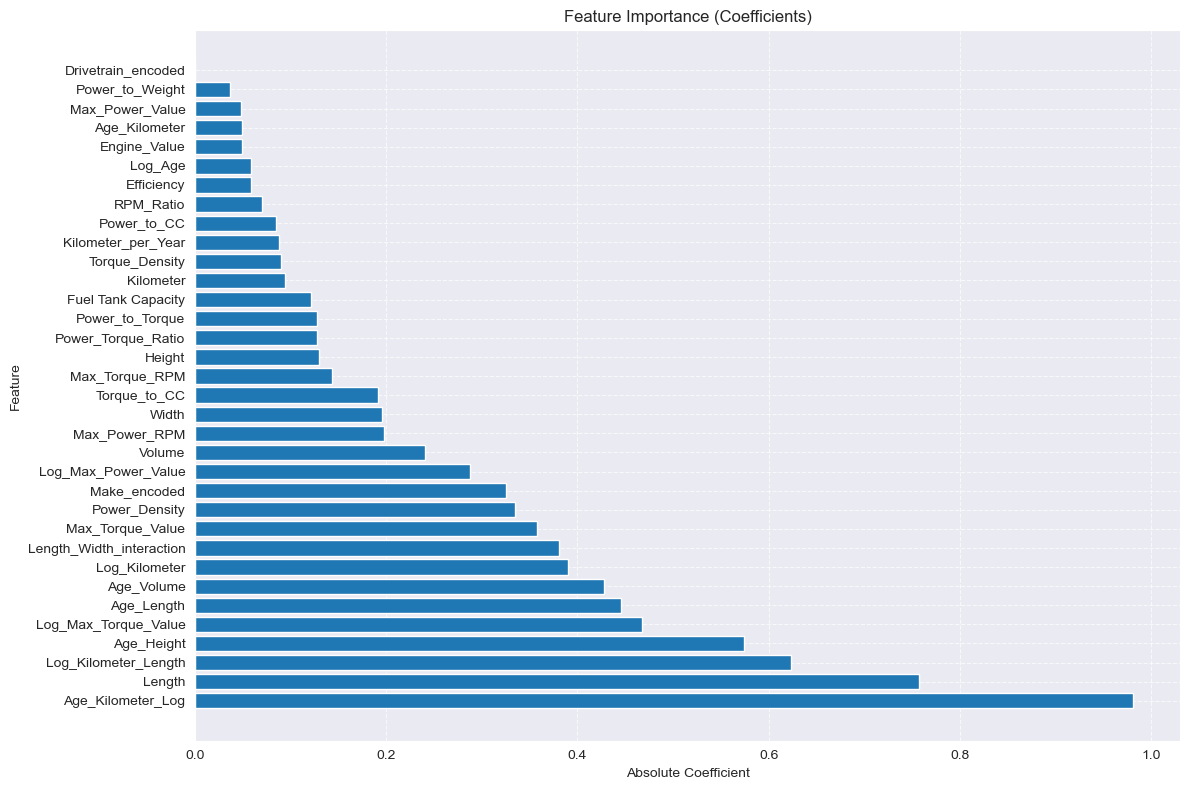

Đã thêm tính năng: Log_Max_Power_Value, Số tính năng: 1, R² test: 0.7106
Đã thêm tính năng: Age_Kilometer_Log, Số tính năng: 2, R² test: 0.8702
Đã thêm tính năng: Make_encoded, Số tính năng: 3, R² test: 0.9137
Đã thêm tính năng: Fuel Tank Capacity, Số tính năng: 4, R² test: 0.9205
Đã thêm tính năng: Length_Width_interaction, Số tính năng: 5, R² test: 0.9229
Đã thêm tính năng: Max_Power_Value, Số tính năng: 6, R² test: 0.9263
Đã thêm tính năng: Age_Volume, Số tính năng: 7, R² test: 0.9286
Đã thêm tính năng: Age_Height, Số tính năng: 8, R² test: 0.9328
Đã thêm tính năng: Engine_Value, Số tính năng: 9, R² test: 0.9332
Đã thêm tính năng: Age_Kilometer, Số tính năng: 10, R² test: 0.9334
Bắt đầu với 34 tính năng, R² test: 0.9233
Đã loại bỏ tính năng: Age_Kilometer_Log, Còn lại: 33, R² test: 0.9249
Đã loại bỏ tính năng: Kilometer_per_Year, Còn lại: 32, R² test: 0.9265
Đã loại bỏ tính năng: Log_Age, Còn lại: 31, R² test: 0.9296
Đã loại bỏ tính năng: Torque_Density, Còn lại: 30, R² test: 0.9312

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from utils.data_preprocessing import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử bạn đã có DataFrame (df) chứa dữ liệu của bạn
# df = pd.read_csv('your_data.csv')

# Hàm để lấy các cột số thực từ DataFrame
def get_numeric_columns(df):
    """Chọn các cột có kiểu dữ liệu số thực (float hoặc int)"""
    return df.select_dtypes(include=['float64', 'float32']).columns.tolist()

# Hàm chuẩn bị dữ liệu
def prepare_data(df, target_column, test_size=0.2, random_state=42):
    """
    Chuẩn bị dữ liệu cho việc chọn tính năng

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame chứa dữ liệu
    target_column : str
        Tên cột mục tiêu (y)
    test_size : float
        Tỷ lệ dữ liệu kiểm tra
    random_state : int
        Seed cho việc phân chia dữ liệu

    Returns:
    --------
    X_train, X_test, y_train, y_test, numeric_columns
    """
    # Lấy các cột số thực
    numeric_columns = get_numeric_columns(df)

    # Loại bỏ cột mục tiêu khỏi danh sách các cột tính năng
    if target_column in numeric_columns:
        numeric_columns.remove(target_column)

    # Chia dữ liệu
    X = df[numeric_columns]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    return X_train, X_test, y_train, y_test, numeric_columns

# 1. Chọn tính năng sử dụng tương quan (Correlation)
def select_features_correlation(df, target_column, threshold=0.5):
    """
    Chọn tính năng dựa trên hệ số tương quan với biến mục tiêu

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame chứa dữ liệu
    target_column : str
        Tên cột mục tiêu
    threshold : float
        Ngưỡng tương quan để chọn tính năng

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    numeric_cols = get_numeric_columns(df)

    # Tính ma trận tương quan
    correlation_matrix = df[numeric_cols].corr()

    # Lấy tương quan với biến mục tiêu
    correlation_with_target = correlation_matrix[target_column].abs()

    # Loại bỏ tương quan của biến mục tiêu với chính nó
    correlation_with_target = correlation_with_target.drop(target_column)

    # Chọn các tính năng có tương quan cao hơn ngưỡng
    selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

    return selected_features, correlation_with_target

# 2. Chọn tính năng sử dụng SelectKBest và f_regression
def select_features_f_regression(X_train, y_train, k=5):
    """
    Chọn tính năng sử dụng f_regression

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu
    k : int
        Số lượng tính năng cần chọn

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Áp dụng SelectKBest với f_regression
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X_train_scaled, y_train)

    # Lấy điểm số và chọn các tính năng
    feature_scores = pd.DataFrame({
        'Feature': X_train.columns,
        'Score': selector.scores_
    })

    # Sắp xếp theo điểm số giảm dần
    feature_scores = feature_scores.sort_values('Score', ascending=False)

    # Chọn k tính năng có điểm cao nhất
    selected_features = feature_scores.head(k)['Feature'].tolist()

    return selected_features, feature_scores

# 3. Chọn tính năng sử dụng Recursive Feature Elimination (RFE)
def select_features_rfe(X_train, y_train, n_features_to_select=5):
    """
    Chọn tính năng sử dụng Recursive Feature Elimination

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu
    n_features_to_select : int
        Số lượng tính năng cần chọn

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Khởi tạo mô hình Linear Regression
    model = LinearRegression()

    # Áp dụng RFE
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train_scaled, y_train)

    # Lấy các tính năng được chọn
    feature_ranking = pd.DataFrame({
        'Feature': X_train.columns,
        'Ranking': rfe.ranking_
    })

    # Sắp xếp theo thứ hạng tăng dần (thứ hạng 1 là tốt nhất)
    feature_ranking = feature_ranking.sort_values('Ranking')

    # Chọn các tính năng có thứ hạng bằng 1
    selected_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()

    return selected_features, feature_ranking

# 4. Chọn tính năng dựa trên hệ số hồi quy
def select_features_coefficients(X_train, y_train, threshold=0.1):
    """
    Chọn tính năng dựa trên giá trị tuyệt đối của hệ số hồi quy

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu
    threshold : float
        Ngưỡng giá trị tuyệt đối của hệ số hồi quy để chọn tính năng

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    """
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Khởi tạo và huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Lấy hệ số hồi quy
    coefficients = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': model.coef_
    })

    # Lấy giá trị tuyệt đối của hệ số
    coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

    # Sắp xếp theo giá trị tuyệt đối giảm dần
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

    # Chọn các tính năng có hệ số lớn hơn ngưỡng
    selected_features = coefficients[coefficients['Abs_Coefficient'] > threshold]['Feature'].tolist()

    return selected_features, coefficients
# 5. Forward Feature Selection
def forward_selection(X_train, X_test, y_train, y_test, max_features=None):
    """
    Thực hiện forward feature selection để tìm ra tập hợp tính năng tối ưu

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    X_test : pandas.DataFrame
        DataFrame chứa các tính năng kiểm tra
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu huấn luyện
    y_test : pandas.Series
        Chuỗi chứa giá trị mục tiêu kiểm tra
    max_features : int, optional
        Số lượng tính năng tối đa cần chọn. Mặc định là None (tất cả các tính năng).

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    scores_history : dict
        Lịch sử điểm số (R²) theo số lượng tính năng
    """
    # Khởi tạo danh sách tính năng đã chọn và các tính năng còn lại
    selected_features = []
    remaining_features = list(X_train.columns)

    # Số lượng tính năng tối đa
    if max_features is None:
        max_features = len(remaining_features)
    else:
        max_features = min(max_features, len(remaining_features))

    # Lưu lịch sử điểm số
    scores_history = {'num_features': [], 'r2_train': [], 'r2_test': []}

    # Tiếp tục cho đến khi đạt đủ số lượng tính năng hoặc không còn tính năng nào
    while len(selected_features) < max_features and remaining_features:
        best_score = -np.inf
        best_feature = None

        # Thử từng tính năng còn lại
        for feature in remaining_features:
            # Thêm tính năng hiện tại vào tập đã chọn
            current_features = selected_features + [feature]

            # Huấn luyện mô hình với tập tính năng hiện tại
            model = LinearRegression()
            model.fit(X_train[current_features], y_train)

            # Đánh giá trên tập kiểm tra
            score = model.score(X_test[current_features], y_test)

            # Cập nhật nếu tìm thấy tính năng tốt hơn
            if score > best_score:
                best_score = score
                best_feature = feature

        # Thêm tính năng tốt nhất vào danh sách đã chọn
        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

            # Tính điểm trên cả tập huấn luyện và kiểm tra
            model = LinearRegression()
            model.fit(X_train[selected_features], y_train)
            train_score = model.score(X_train[selected_features], y_train)
            test_score = model.score(X_test[selected_features], y_test)

            # Lưu lịch sử
            scores_history['num_features'].append(len(selected_features))
            scores_history['r2_train'].append(train_score)
            scores_history['r2_test'].append(test_score)

            print(f"Đã thêm tính năng: {best_feature}, Số tính năng: {len(selected_features)}, R² test: {test_score:.4f}")
        else:
            # Không tìm thấy tính năng nào cải thiện điểm số
            break

    return selected_features, scores_history

# 6. Backward Feature Elimination
def backward_elimination(X_train, X_test, y_train, y_test, min_features=1):
    """
    Thực hiện backward feature elimination để tìm ra tập hợp tính năng tối ưu

    Parameters:
    -----------
    X_train : pandas.DataFrame
        DataFrame chứa các tính năng huấn luyện
    X_test : pandas.DataFrame
        DataFrame chứa các tính năng kiểm tra
    y_train : pandas.Series
        Chuỗi chứa giá trị mục tiêu huấn luyện
    y_test : pandas.Series
        Chuỗi chứa giá trị mục tiêu kiểm tra
    min_features : int
        Số lượng tính năng tối thiểu cần giữ lại

    Returns:
    --------
    selected_features : list
        Danh sách các tính năng được chọn
    scores_history : dict
        Lịch sử điểm số (R²) theo số lượng tính năng
    """
    # Bắt đầu với tất cả các tính năng
    selected_features = list(X_train.columns)

    # Lưu lịch sử điểm số
    scores_history = {'num_features': [], 'r2_train': [], 'r2_test': []}

    # Huấn luyện mô hình với tất cả các tính năng
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)

    # Tính điểm ban đầu
    train_score = model.score(X_train[selected_features], y_train)
    test_score = model.score(X_test[selected_features], y_test)

    # Lưu lịch sử ban đầu
    scores_history['num_features'].append(len(selected_features))
    scores_history['r2_train'].append(train_score)
    scores_history['r2_test'].append(test_score)

    print(f"Bắt đầu với {len(selected_features)} tính năng, R² test: {test_score:.4f}")

    # Tiếp tục loại bỏ cho đến khi đạt số lượng tính năng tối thiểu
    while len(selected_features) > min_features:
        worst_score = -np.inf
        worst_feature = None

        # Thử loại bỏ từng tính năng
        for feature in selected_features:
            # Tạo danh sách tính năng không bao gồm tính năng hiện tại
            current_features = [f for f in selected_features if f != feature]

            # Huấn luyện mô hình với tập tính năng hiện tại
            model = LinearRegression()
            model.fit(X_train[current_features], y_train)

            # Đánh giá trên tập kiểm tra
            score = model.score(X_test[current_features], y_test)

            # Cập nhật nếu điểm số tốt hơn (hoặc bằng) khi loại bỏ tính năng này
            if score > worst_score:
                worst_score = score
                worst_feature = feature

        # Nếu loại bỏ tính năng tồi nhất không làm giảm đáng kể hiệu suất
        if worst_score >= test_score - 0.01:  # Cho phép giảm nhẹ 1%
            # Loại bỏ tính năng tồi nhất
            selected_features.remove(worst_feature)

            # Cập nhật điểm hiện tại
            test_score = worst_score

            # Tính điểm trên tập huấn luyện
            model = LinearRegression()
            model.fit(X_train[selected_features], y_train)
            train_score = model.score(X_train[selected_features], y_train)

            # Lưu lịch sử
            scores_history['num_features'].append(len(selected_features))
            scores_history['r2_train'].append(train_score)
            scores_history['r2_test'].append(test_score)

            print(f"Đã loại bỏ tính năng: {worst_feature}, Còn lại: {len(selected_features)}, R² test: {test_score:.4f}")
        else:
            # Không thể loại bỏ thêm tính năng mà không ảnh hưởng đáng kể đến hiệu suất
            print(f"Dừng loại bỏ: Mất mát quá lớn nếu loại bỏ thêm tính năng")
            break

    return selected_features, scores_history

# 7. Sequential Feature Selection
def sequential_feature_selection(X_train, X_test, y_train, y_test, direction='forward', max_features=None, min_features=1):
    """
    Thực hiện sequential feature selection (forward hoặc backward)

    Parameters:
    -----------
    X_train, X_test, y_train, y_test : DataFrame/Series
        Dữ liệu huấn luyện và kiểm tra
    direction : str
        'forward' hoặc 'backward' để chỉ định hướng lựa chọn
    max_features : int
        Số lượng tính năng tối đa cho forward selection
    min_features : int
        Số lượng tính năng tối thiểu cho backward elimination

    Returns:
    --------
    selected_features, scores_history
    """
    if direction == 'forward':
        return forward_selection(X_train, X_test, y_train, y_test, max_features)
    elif direction == 'backward':
        return backward_elimination(X_train, X_test, y_train, y_test, min_features)
    else:
        raise ValueError("direction phải là 'forward' hoặc 'backward'")

# 5. Trực quan hóa đánh giá tính năng
def visualize_feature_importance(feature_scores, title="Feature Importance", figsize=(12, 8)):
    """
    Trực quan hóa điểm số quan trọng của tính năng

    Parameters:
    -----------
    feature_scores : pandas.DataFrame
        DataFrame chứa điểm số của các tính năng
    title : str
        Tiêu đề của biểu đồ
    figsize : tuple
        Kích thước của biểu đồ
    """
    # Sắp xếp theo điểm số giảm dần
    if 'Score' in feature_scores.columns:
        sort_col = 'Score'
        feature_scores = feature_scores.sort_values(sort_col, ascending=False)
    elif 'Coefficient' in feature_scores.columns:
        sort_col = 'Abs_Coefficient'
        feature_scores = feature_scores.sort_values(sort_col, ascending=False)

    plt.figure(figsize=figsize)

    if 'Score' in feature_scores.columns:
        plt.barh(feature_scores['Feature'], feature_scores['Score'])
        plt.xlabel('Score')
    elif 'Coefficient' in feature_scores.columns:
        plt.barh(feature_scores['Feature'], feature_scores['Abs_Coefficient'])
        plt.xlabel('Absolute Coefficient')

    plt.ylabel('Feature')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_feature_selection_history(forward_history=None, backward_history=None, figsize=(12, 6)):
    """
    Vẽ biểu đồ R² theo số lượng tính năng cho cả forward và backward selection
    """
    plt.figure(figsize=figsize)

    if forward_history:
        plt.plot(forward_history['num_features'], forward_history['r2_test'],
                'b-o', label='Forward Selection (Test)')
        plt.plot(forward_history['num_features'], forward_history['r2_train'],
                'b--', label='Forward Selection (Train)')

    if backward_history:
        plt.plot(backward_history['num_features'], backward_history['r2_test'],
                'r-o', label='Backward Elimination (Test)')
        plt.plot(backward_history['num_features'], backward_history['r2_train'],
                'r--', label='Backward Elimination (Train)')

    plt.xlabel('Số lượng tính năng')
    plt.ylabel('R² Score')
    plt.title('Hiệu suất mô hình theo số lượng tính năng')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Tìm số lượng tính năng tối ưu (R² cao nhất trên tập kiểm tra)
    if forward_history:
        max_forward_idx = np.argmax(forward_history['r2_test'])
        max_forward_num = forward_history['num_features'][max_forward_idx]
        max_forward_score = forward_history['r2_test'][max_forward_idx]
        plt.plot(max_forward_num, max_forward_score, 'bo', markersize=10,
                label=f'Tối ưu (Forward): {max_forward_num} tính năng')

    if backward_history:
        max_backward_idx = np.argmax(backward_history['r2_test'])
        max_backward_num = backward_history['num_features'][max_backward_idx]
        max_backward_score = backward_history['r2_test'][max_backward_idx]
        plt.plot(max_backward_num, max_backward_score, 'ro', markersize=10,
                label=f'Tối ưu (Backward): {max_backward_num} tính năng')

    plt.legend()
    plt.show()

    # 7. Tìm tập tính năng tối ưu và huấn luyện mô hình cuối cùng
def find_optimal_features_and_train(X_train, X_test, y_train, y_test, method='combined'):
    """
    Tìm tập tính năng tối ưu và huấn luyện mô hình cuối cùng

    Parameters:
    -----------
    X_train, X_test, y_train, y_test : DataFrame/Series
        Dữ liệu huấn luyện và kiểm tra
    method : str
        'forward', 'backward', hoặc 'combined' (chạy cả hai và chọn cái tốt hơn)

    Returns:
    --------
    final_model, optimal_features, final_score
    """
    if method == 'forward' or method == 'combined':
        forward_features, forward_history = sequential_feature_selection(
            X_train, X_test, y_train, y_test, direction='forward')
        forward_max_idx = np.argmax(forward_history['r2_test'])
        forward_optimal_num = forward_history['num_features'][forward_max_idx]
        forward_optimal_score = forward_history['r2_test'][forward_max_idx]

        # Nếu không phải số lượng tính năng cuối cùng, lấy đúng số lượng tính năng tối ưu
        if forward_optimal_num != len(forward_features):
            forward_features = forward_features[:forward_optimal_num]

        print(f"\nForward Selection - Số tính năng tối ưu: {forward_optimal_num}")
        print(f"Forward Selection - R² tối ưu: {forward_optimal_score:.4f}")
        print(f"Forward Selection - Tính năng: {forward_features}")

    if method == 'backward' or method == 'combined':
        backward_features, backward_history = sequential_feature_selection(
            X_train, X_test, y_train, y_test, direction='backward')
        backward_max_idx = np.argmax(backward_history['r2_test'])
        backward_optimal_score = backward_history['r2_test'][backward_max_idx]

        print(f"\nBackward Elimination - Số tính năng tối ưu: {len(backward_features)}")
        print(f"Backward Elimination - R² tối ưu: {backward_optimal_score:.4f}")
        print(f"Backward Elimination - Tính năng: {backward_features}")

    # Chọn phương pháp tốt nhất
    if method == 'combined':
        if forward_optimal_score > backward_optimal_score:
            print("\nPhương pháp Forward Selection tốt hơn!")
            optimal_features = forward_features
            optimal_score = forward_optimal_score
        else:
            print("\nPhương pháp Backward Elimination tốt hơn!")
            optimal_features = backward_features
            optimal_score = backward_optimal_score
    elif method == 'forward':
        optimal_features = forward_features
        optimal_score = forward_optimal_score
    else:  # backward
        optimal_features = backward_features
        optimal_score = backward_optimal_score

    # Huấn luyện mô hình cuối cùng
    final_model = LinearRegression()
    final_model.fit(X_train[optimal_features], y_train)

    # Đánh giá mô hình
    y_pred = final_model.predict(X_test[optimal_features])
    final_score = {
        'r2': optimal_score,
        'mse': np.mean((y_test - y_pred) ** 2),
        'rmse': np.sqrt(np.mean((y_test - y_pred) ** 2)),
        'mae': np.mean(np.abs(y_test - y_pred))
    }

    print("\nMô hình cuối cùng:")
    print(f"Số tính năng: {len(optimal_features)}")
    print(f"Tính năng: {optimal_features}")
    print(f"R²: {final_score['r2']:.4f}")
    print(f"RMSE: {final_score['rmse']:.4f}")
    print(f"MAE: {final_score['mae']:.4f}")

    return final_model, optimal_features, final_score

# Ví dụ sử dụng:
# 1. Đọc dữ liệu
# df = pd.read_csv('your_data.csv')
df = pd.read_csv("../../Data/train.csv")
processor = VehicleDataPreprocessor()
df = processor.preprocess(df, train=True, norm=False)
# featSelector = FeatureSelector(pre_process_df=df)
# selected_features, df = featSelector.get_df(model_id=4)
scaler = StandardScaler()

y = df["Log_Price"]
X = df.drop("Log_Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

X_train = FeatureSelector._non_linearize_features(X_train).select_dtypes(['float64'])
X_test = FeatureSelector._non_linearize_features(X_test).select_dtypes(['float64'])

# X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
# _, X_train = FeatureSelector.get_df(X_train, model_id=1, get_Log_Price=False)
# _, X_test = FeatureSelector.get_df(X_test, model_id=1, get_Log_Price=False)

# X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy().flatten(), y_test.to_numpy().flatten()

# # 2. Chuẩn bị dữ liệu
# X_train, X_test, y_train, y_test, numeric_columns = prepare_data(df, 'target_column')

# 3. Áp dụng các phương pháp chọn tính năng
corr_features, corr_scores = select_features_correlation(pd.concat([X_train, y_train]), 'Log_Price', threshold=0.5)
fregression_features, fregression_scores = select_features_f_regression(X_train, y_train, k=5)
rfe_features, rfe_ranking = select_features_rfe(X_train, y_train, n_features_to_select=5)
coef_features, coef_scores = select_features_coefficients(X_train, y_train, threshold=0.1)

# 4. Trực quan hóa
visualize_feature_importance(fregression_scores, title="Feature Importance (f_regression)")
visualize_feature_importance(coef_scores, title="Feature Importance (Coefficients)")
forward_features, forward_history = sequential_feature_selection(
    X_train, X_test, y_train, y_test, direction='forward', max_features=10)
backward_features, backward_history = sequential_feature_selection(
    X_train, X_test, y_train, y_test, direction='backward', min_features=3)
final_model, optimal_features, final_score = find_optimal_features_and_train(
    X_train, X_test, y_train, y_test, method='combined')
# visualize_feature_importance(fregression_scores, title="Feature Importance (f_regression)")
# visualize_feature_importance(coef_scores, title="Feature Importance (Coefficients)")

In [17]:
df = pd.read_csv("../../Data/train.csv")

In [18]:
df['Log_Price'] = np.log(df['Price'])

In [47]:
thres = np.exp(df['Log_Price'].quantile(0.9944))
print(thres)
print(sum(df['Price'] > thres))

15468306.941920616
10


<Axes: >

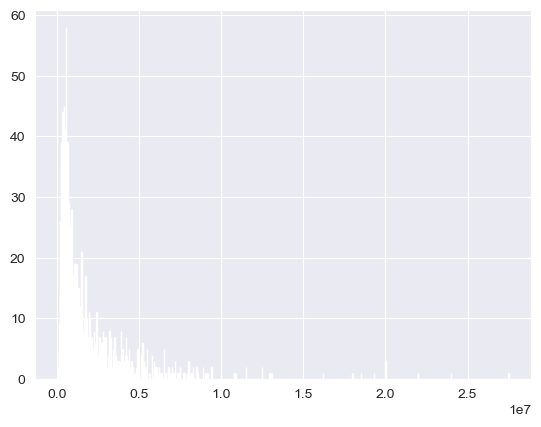

In [48]:
df['Price'].hist(bins=1000)

Index(['Model', 'Year', 'Kilometer', 'Location', 'Length', 'Width', 'Height',
       'Fuel Tank Capacity', 'Engine_Value', 'Max_Power_Value',
       'Max_Power_RPM', 'Max_Torque_Value', 'Max_Torque_RPM', 'Make_encoded',
       'Drivetrain_encoded', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Others',
       'Fuel_Petrol', 'Transmission_is_Automatic', 'Color_Medium',
       'Color_Premium', 'Color_Rare', 'Color_Silver', 'Color_Standard',
       'Color_White', 'Owner_First_Owner', 'Owner_Fourth_Plus_Owner',
       'Owner_New', 'Owner_Second_Owner', 'Owner_Third_Owner',
       'Seller_Commercial Registration', 'Seller_Corporate', 'Seating_2',
       'Seating_4', 'Seating_6', 'Seating_7', 'Seating_8', 'Volume',
       'Power_to_Weight', 'Efficiency', 'Log_Kilometer', 'Log_Max_Power_Value',
       'Log_Max_Torque_Value', 'Power_Density', 'Torque_Density',
       'Power_Torque_Ratio', 'Length_Width_interaction', 'Sin_Year',
       'Year_Inverse', 'Age', 'Age_squared', 'Log_Age', 'Sin_Age',
       'Age_

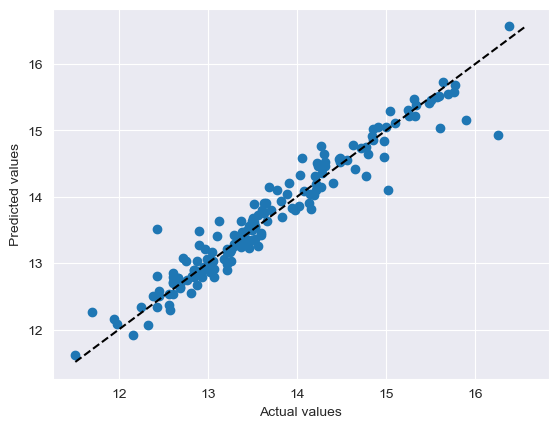

302543.46578557335

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from PreProcessing.FeatureSelector import FeatureSelector
from PreProcessing.VehicleDataPreprocessor import VehicleDataPreprocessor
from LinearModel.StandardScaler import StandardScaler
from utils.data_preprocessing import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../../Data/train.csv")
processor = VehicleDataPreprocessor()
df = processor.preprocess(df, train=True, norm=False)
# featSelector = FeatureSelector(pre_process_df=df)
# selected_features, df = featSelector.get_df(model_id=4)
scaler = StandardScaler()

y = df["Log_Price"]
X = df.drop("Log_Price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=43)

X_train = FeatureSelector._non_linearize_features(X_train)
X_test = FeatureSelector._non_linearize_features(X_test)

print(X_train.columns)

# print(X_train.shape)

_, X_train = FeatureSelector.get_df(X_train, model_id=0, get_Log_Price=False)
_, X_test = FeatureSelector.get_df(X_test, model_id=0, get_Log_Price=False)

# print(X_train.shape)

X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

# print(X_train.shape)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# Add perfect prediction line
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')
plt.show()
mean_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
